### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [2]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [3]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [4]:
df = df.rename(columns=column_names)

In [5]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

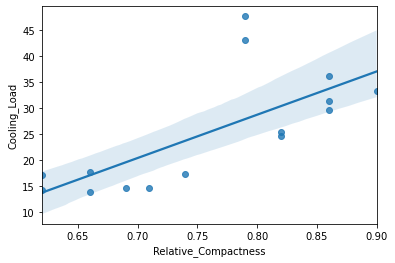

In [7]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
data=simple_linear_reg_df)

### Measuring Regression Performance

##### Mean Absolute Error (MAE)

In [8]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [9]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)


In [10]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression()

In [11]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [12]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.063

In [13]:
#RSS
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

1.828

In [14]:
#Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [15]:
#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

### Penelization Methods

#### Ridge Regression

In [16]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

####  Feature Selection and Lasso Regression

In [17]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [18]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [19]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [20]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [21]:
final_weights.head()

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Roof_Area,-6.241589e+12,-0.163192,-0.000000
1,Wall_Area,-4.854569e+12,0.103061,0.200087
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
3,Orientation,4.577637e-03,0.003369,0.000000
4,Glazing_Area_Distribution,3.216696e-02,0.029088,0.021431


### Quiz

In [2]:
df=pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df_norm = df.drop(['date', 'lights'], axis =1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df_norm), columns=df_norm.columns)


In [10]:
X = normalised_df[['T2']]
X.shape

(19735, 1)

In [11]:
y = normalised_df['T6']
y.shape

(19735,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
pred_lr= lr.predict(X_test)

In [25]:
r2 = r2_score(y_test, pred_lr)
round(r2, 2)

0.64

In [23]:
mse = mean_squared_error(y_test, pred_lr)
round(mse, 2)

0.01

In [22]:
rss = np.sum(np.square(y_test - pred_lr))
round(rss,2)

66.12

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
round(rmse, 2)

0.11

In [26]:
X2 = normalised_df.drop(['Appliances'], axis = 1)

In [28]:
X2.shape

(19735, 26)

In [31]:
y2 = normalised_df['Appliances']

In [32]:
y2.shape

(19735,)

In [33]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [30]:
lr2 = LinearRegression()

In [34]:
lr2.fit(X2_train, y2_train)

LinearRegression()

In [38]:
min(lr2.coef_)

-27596028150.21915

In [39]:
max(lr2.coef_)

27596028150.22073

In [42]:
lr2.singular_

array([6.98169161e+01, 5.30056830e+01, 4.82308622e+01, 2.87229057e+01,
       2.14922578e+01, 2.05809891e+01, 1.70928501e+01, 1.49828186e+01,
       1.39859613e+01, 1.23081240e+01, 1.03324358e+01, 9.50678766e+00,
       8.67299342e+00, 7.71176735e+00, 7.51244754e+00, 7.08156736e+00,
       6.38907494e+00, 5.67817735e+00, 4.77060781e+00, 4.38746383e+00,
       4.01951655e+00, 3.74585242e+00, 3.14983559e+00, 1.92717838e+00,
       1.27569045e+00, 3.58683995e-14])

In [44]:
lr2_pred = lr2.predict(X2_test)

In [47]:
r22 = r2_score(y2_test, lr2_pred)
round(r22, 2)

0.15

In [55]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X2_train, y2_train)

Ridge(alpha=0.4)

In [56]:
pred_ridge_reg = ridge_reg.predict(X2_test)

In [57]:
rmse = np.sqrt(mean_squared_error(y2_test, pred_ridge_reg))
round(rmse, 2)

0.09

In [52]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X2_train, y2_train)

Lasso(alpha=0.001)

In [53]:
pred_lasso_reg = lasso_reg.predict(X2_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y2_test, pred_lasso_reg))
round(rmse, 2)

0.09

In [54]:
lasso_reg.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])